In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler

from random import randint, sample
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.decomposition import PCA

from time import time
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D

In [2]:
unique = pd.read_csv('unique_m.csv')
unique = unique.set_index('material')
unique = unique.drop(['critical_temp'], axis = 1)

In [3]:
unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
material,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Ba0.1La1.9Ag0.1Cu0.9O4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Ba0.1La1.9Cu1O4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Ba0.15La1.85Cu1O4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Ba0.3La1.7Cu1O4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [4]:
data = pd.read_csv('train.csv')
data = data.set_index(unique.index)

In [5]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
material,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
Ba0.1La1.9Ag0.1Cu0.9O4,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
Ba0.1La1.9Cu1O4,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
Ba0.15La1.85Cu1O4,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
Ba0.3La1.7Cu1O4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### First want to visualize the distributions of all of the features.

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


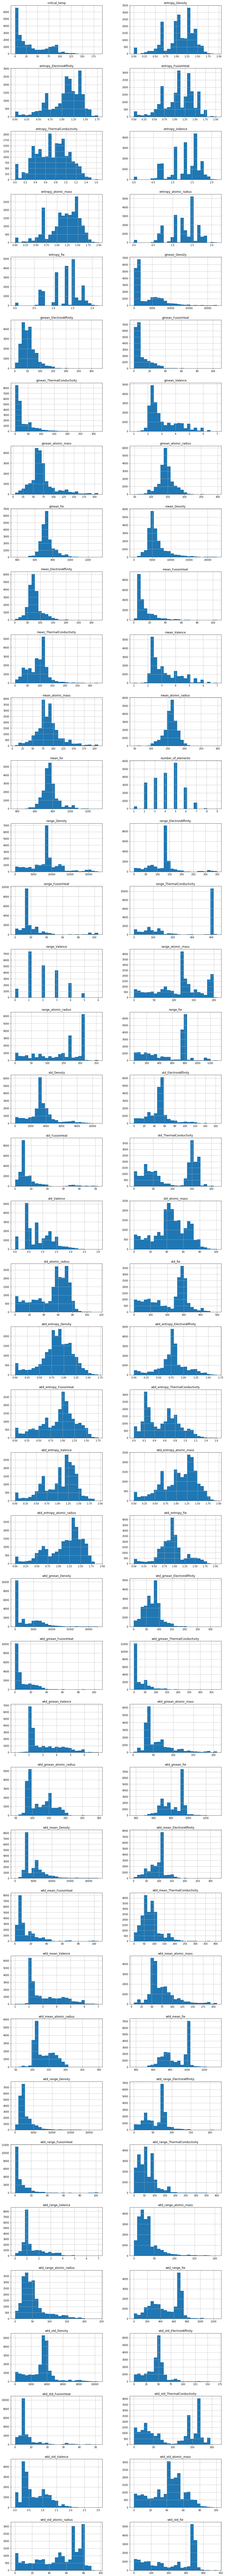

In [6]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
data.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


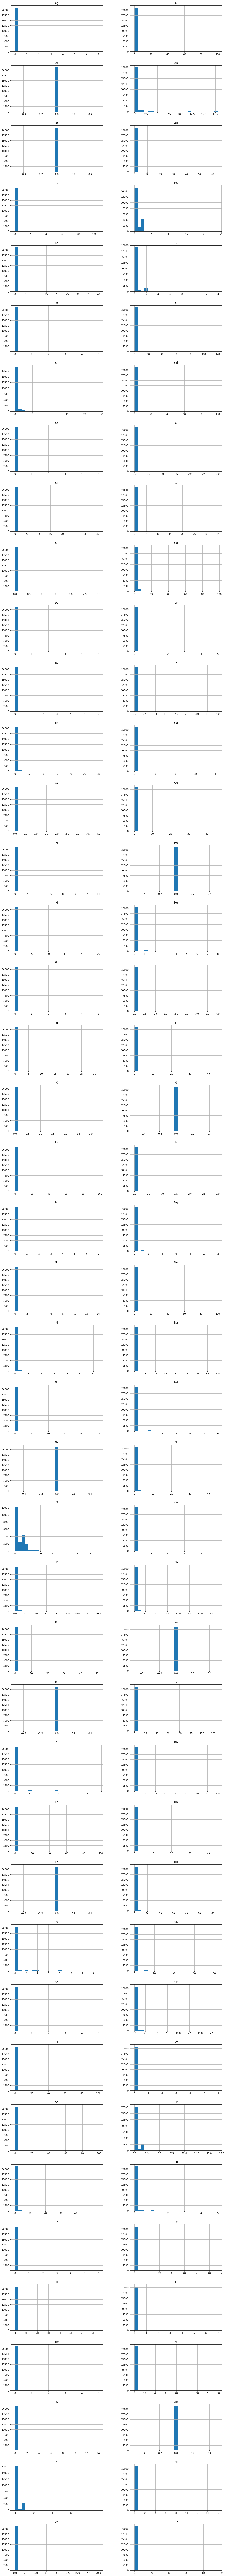

In [7]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
unique.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

### Next visualizing the critical temperature vs. each feature.

In [8]:
combined_data = pd.concat([data, unique], axis=1)

In [9]:
combined_data.shape

(21263, 168)

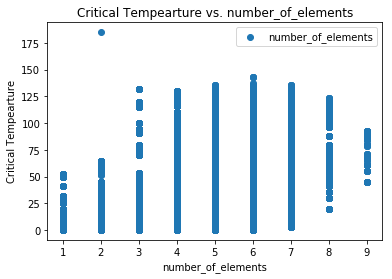

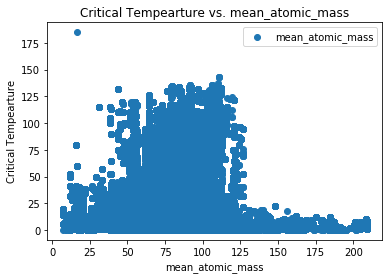

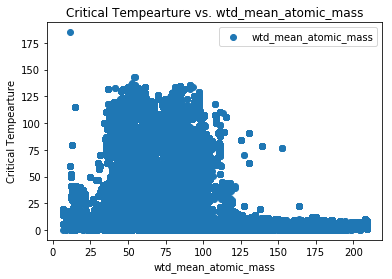

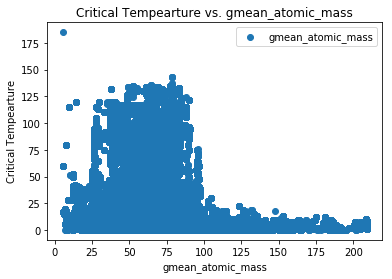

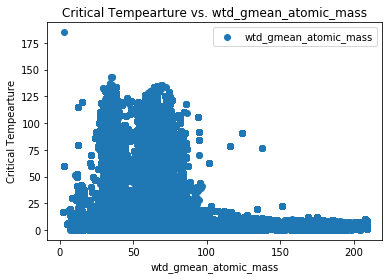

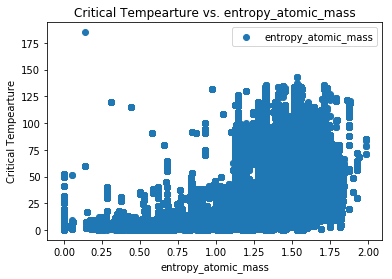

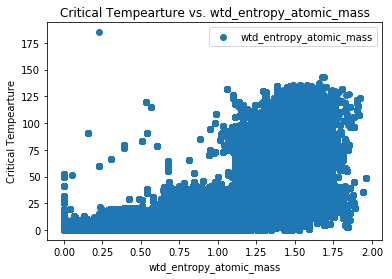

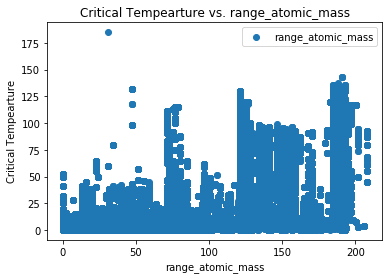

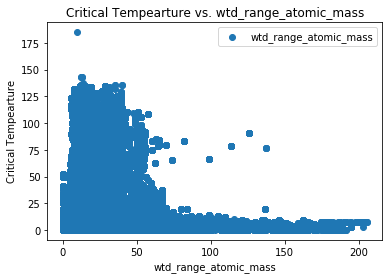

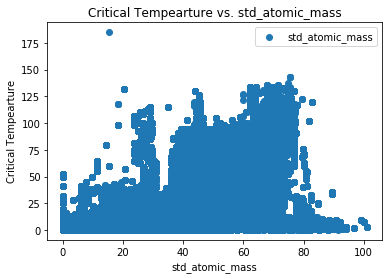

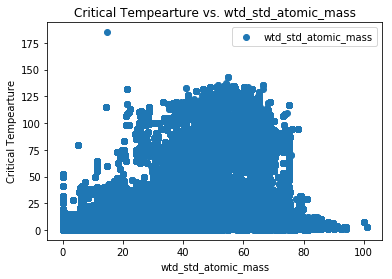

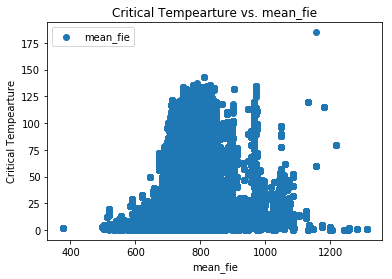

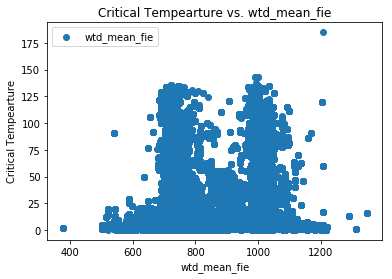

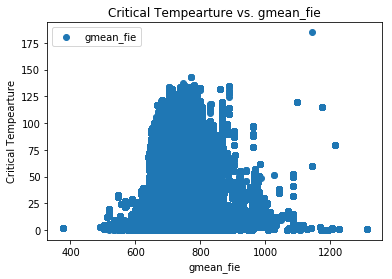

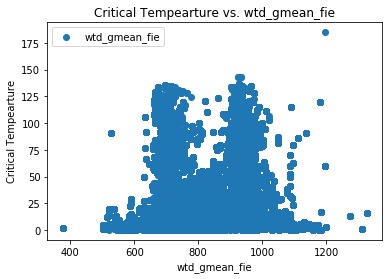

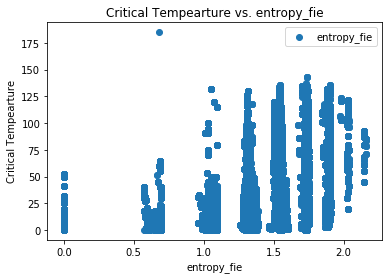

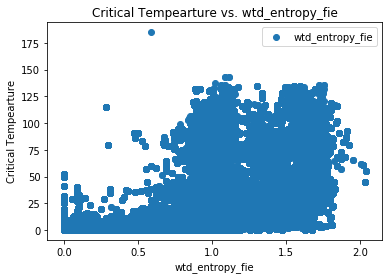

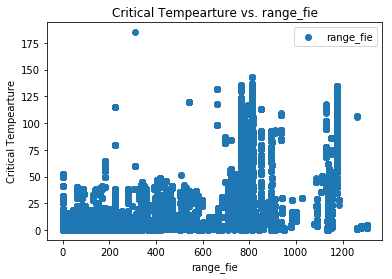

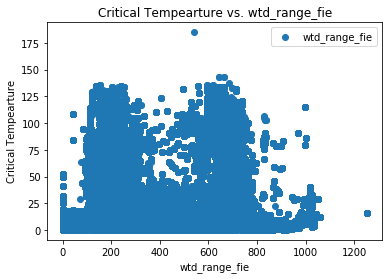

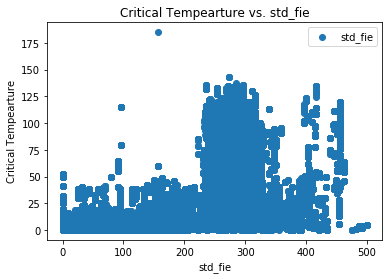

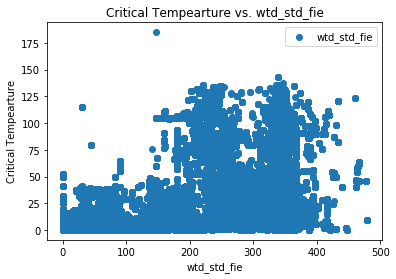

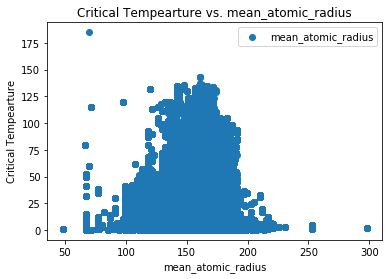

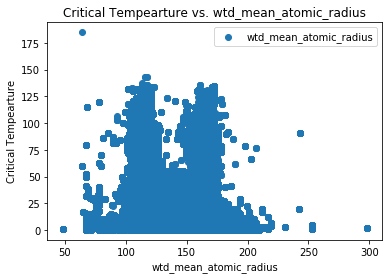

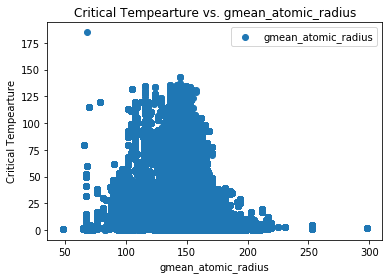

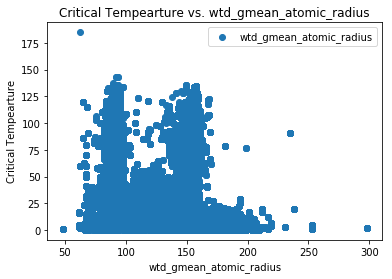

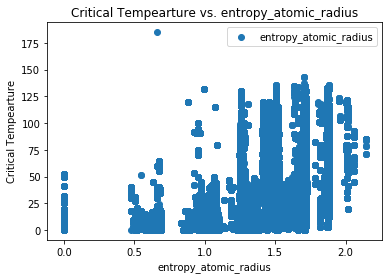

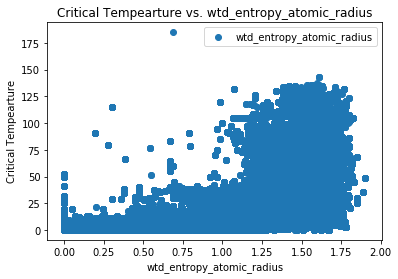

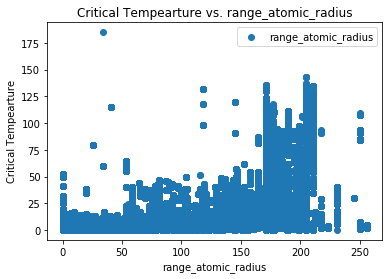

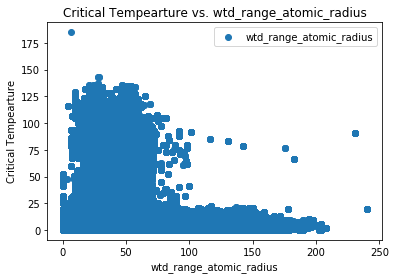

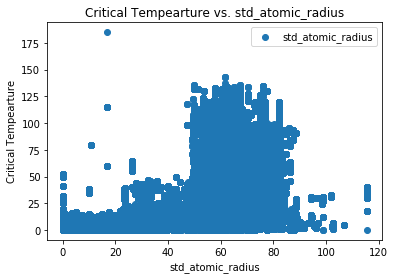

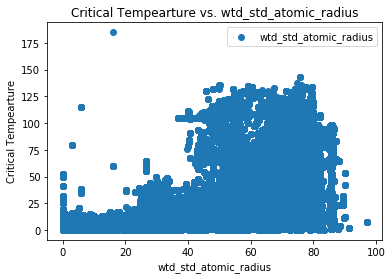

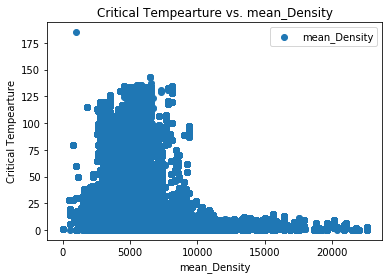

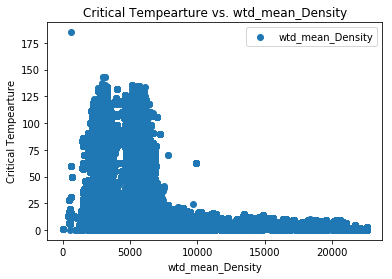

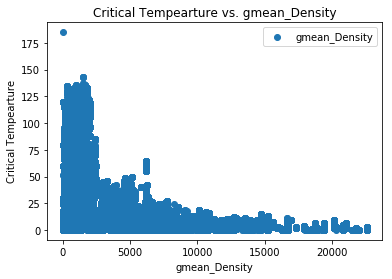

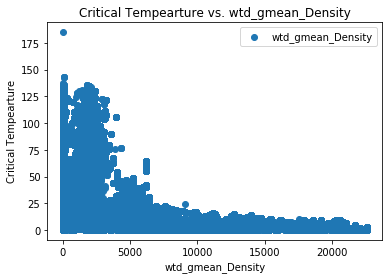

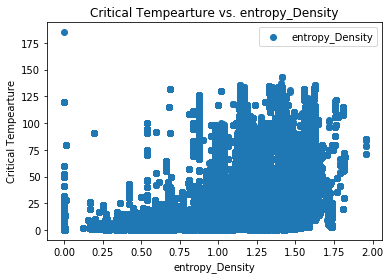

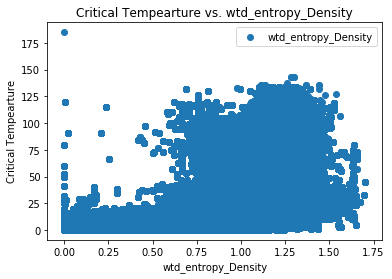

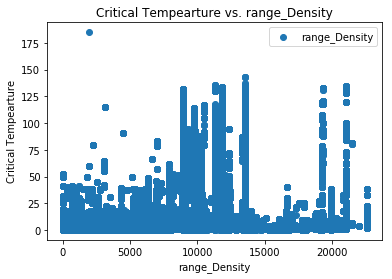

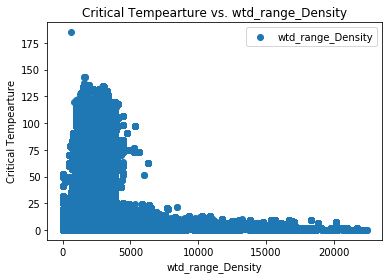

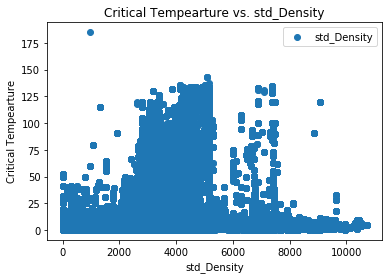

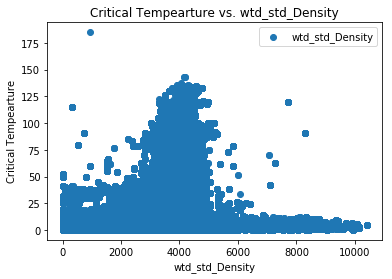

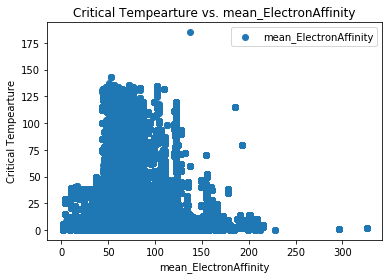

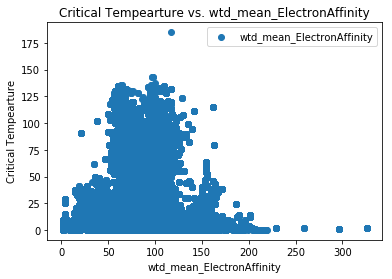

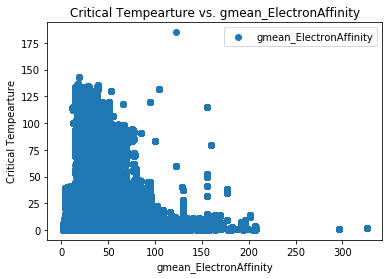

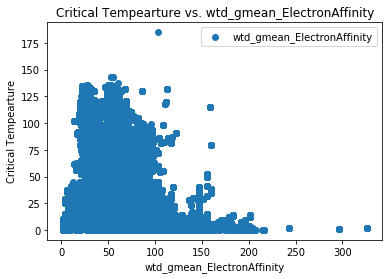

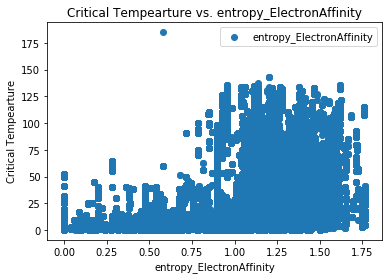

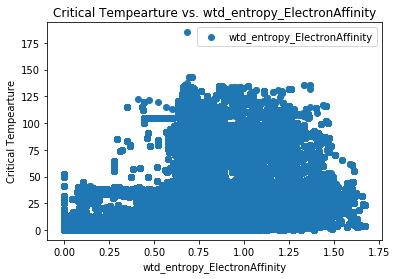

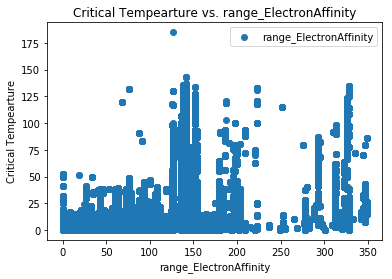

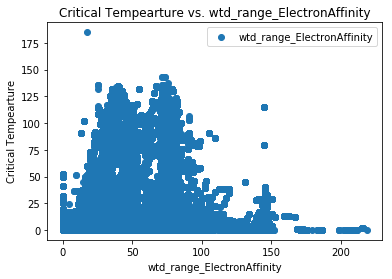

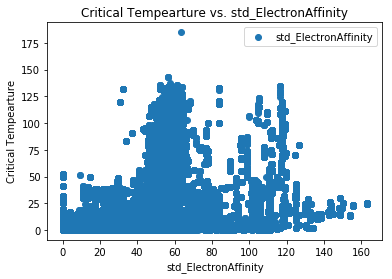

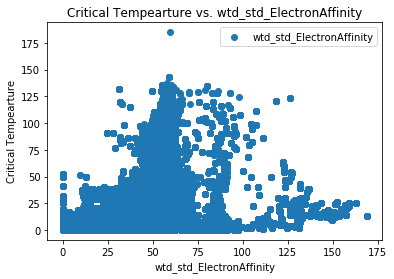

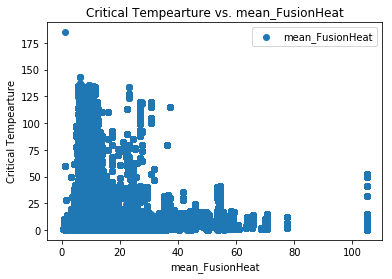

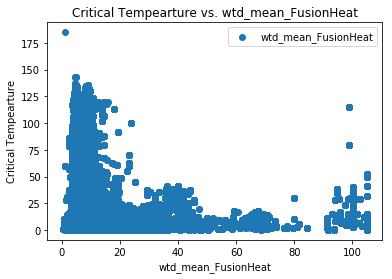

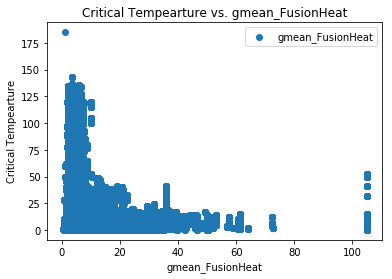

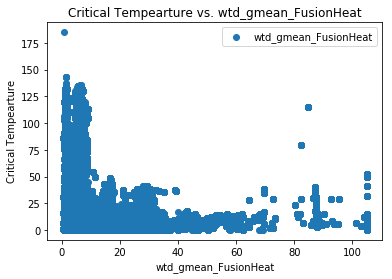

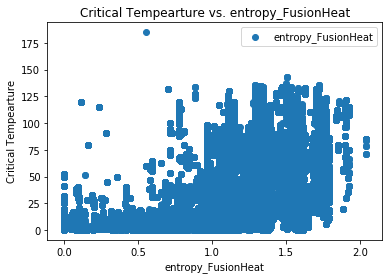

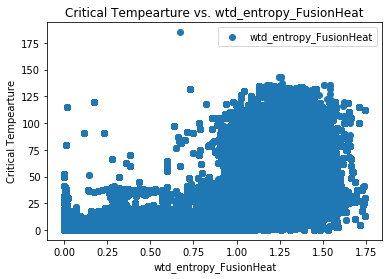

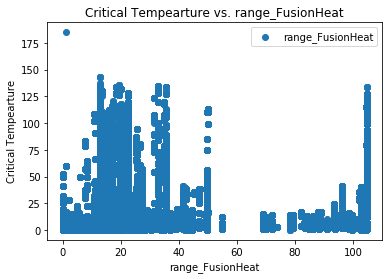

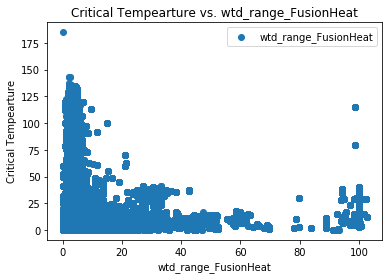

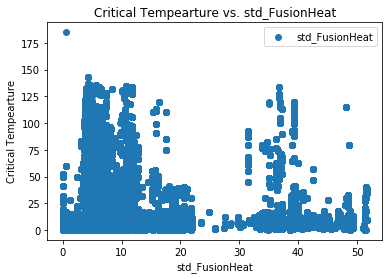

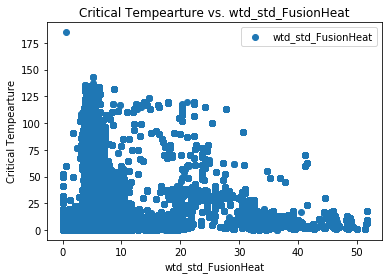

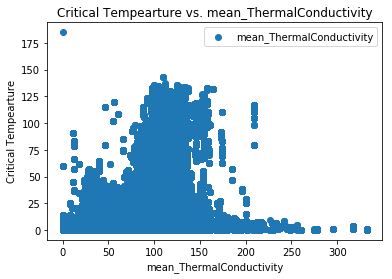

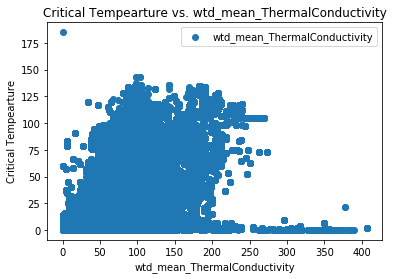

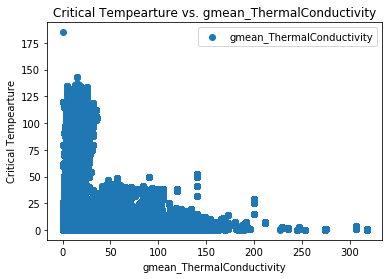

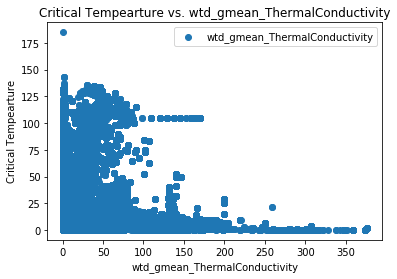

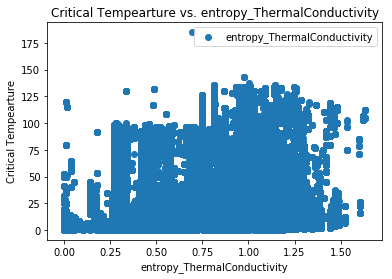

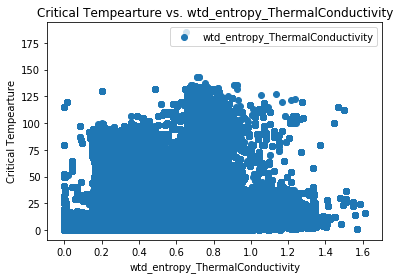

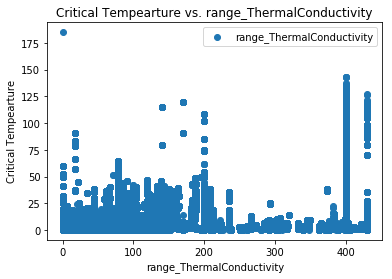

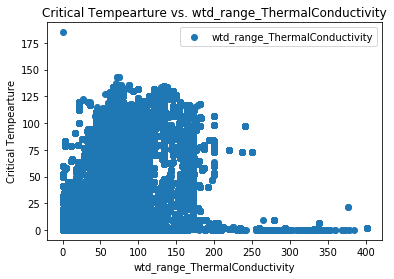

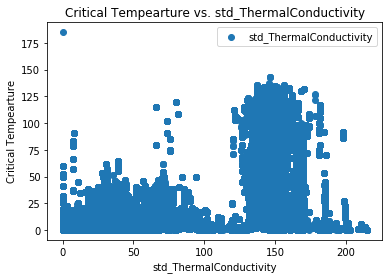

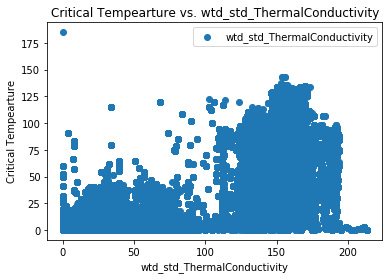

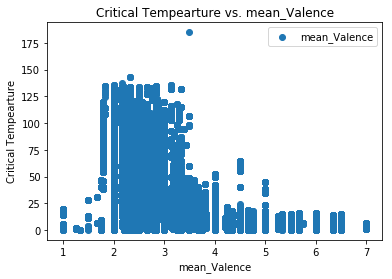

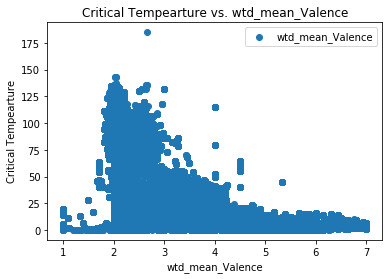

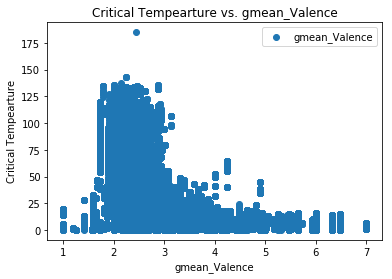

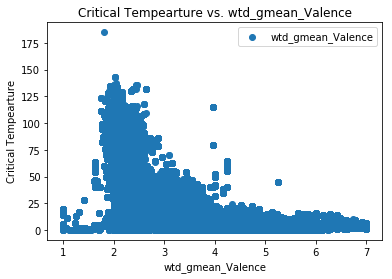

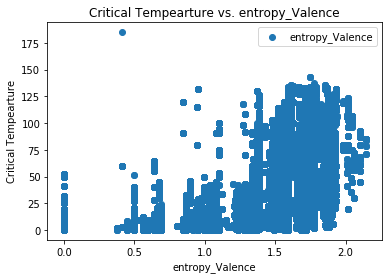

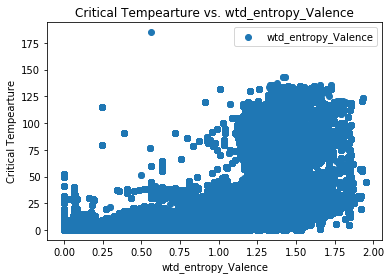

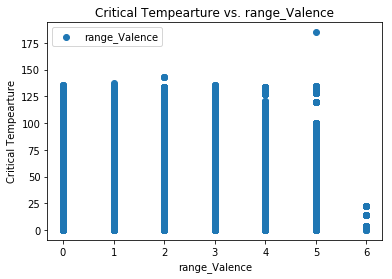

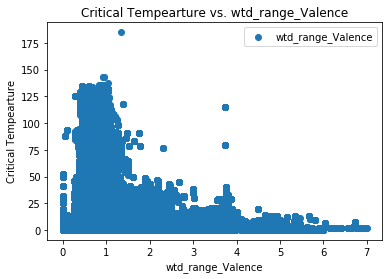

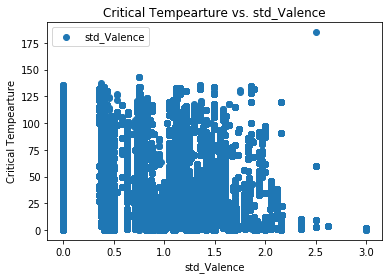

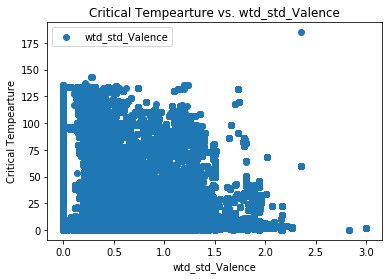

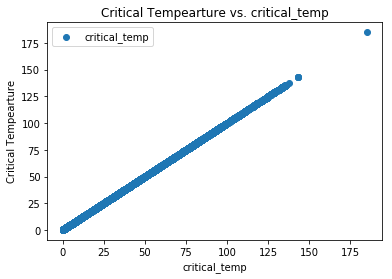

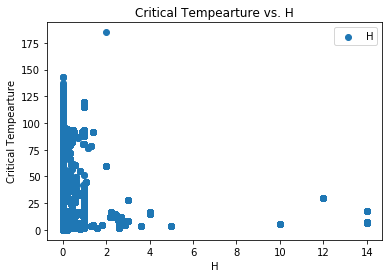

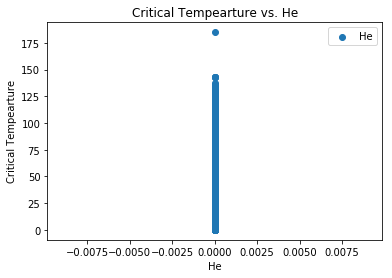

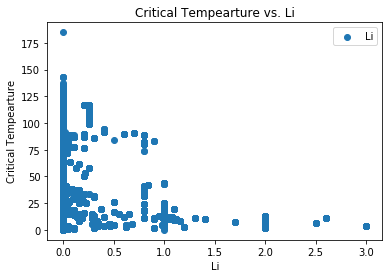

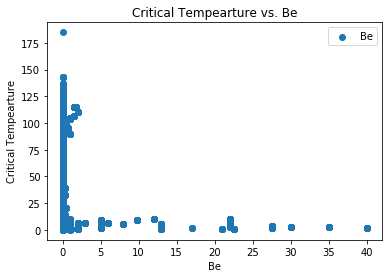

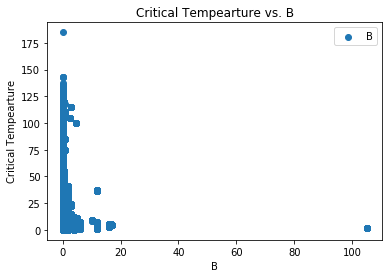

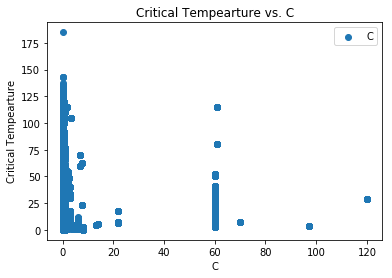

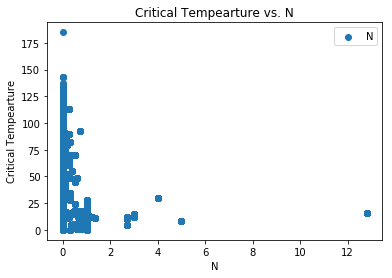

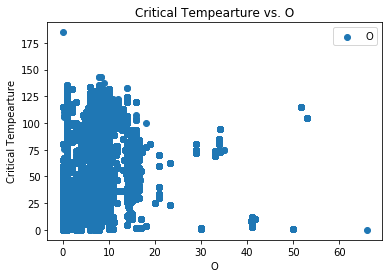

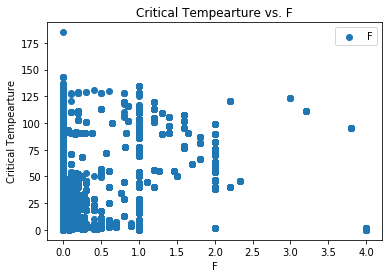

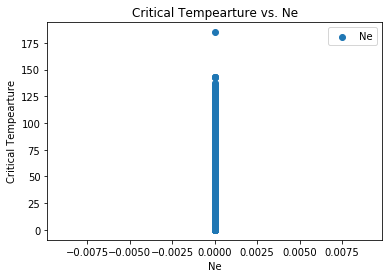

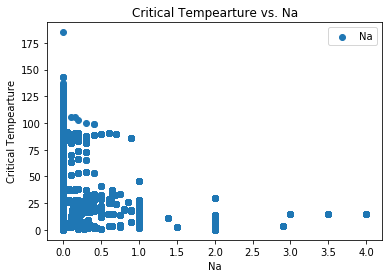

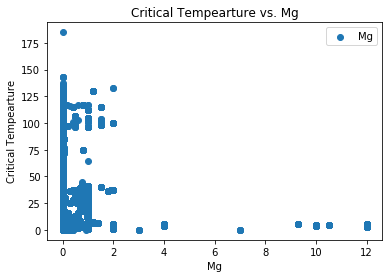

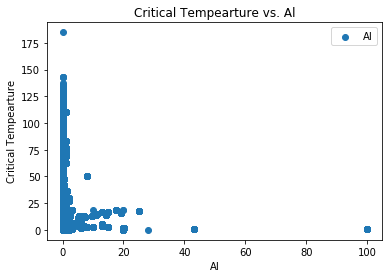

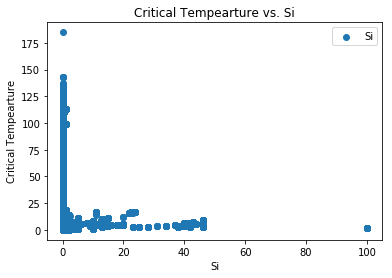

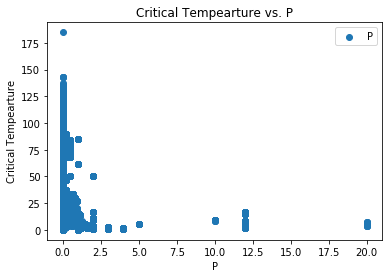

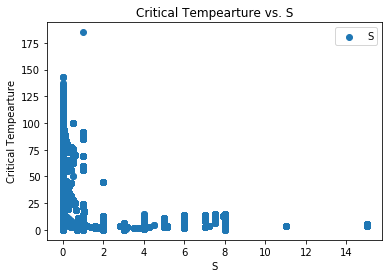

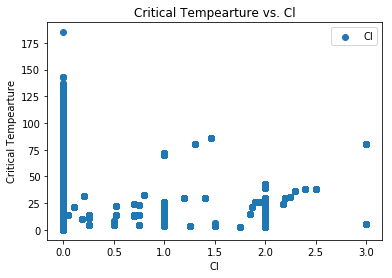

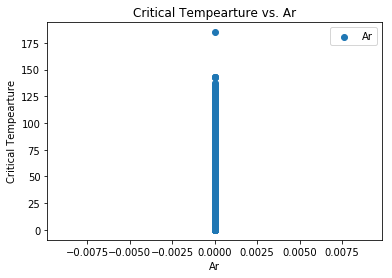

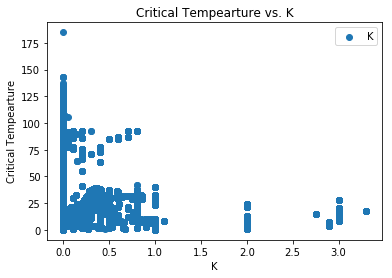

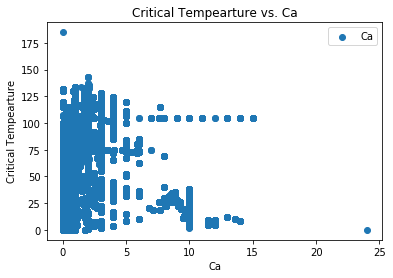

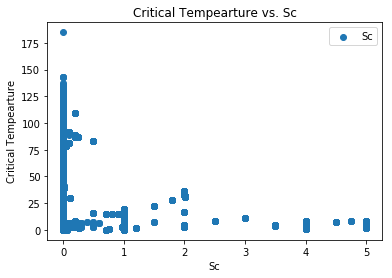

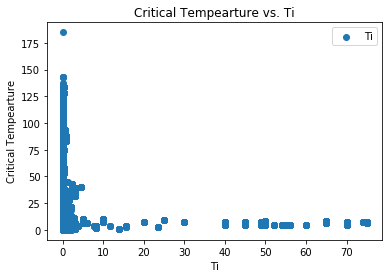

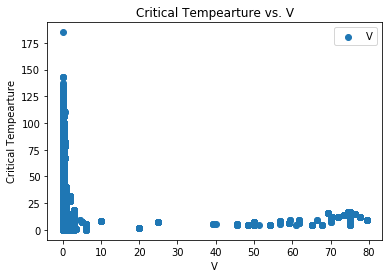

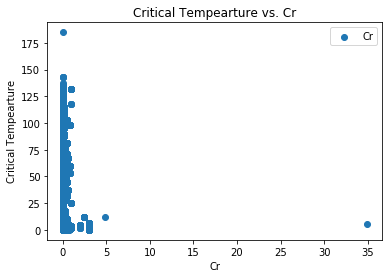

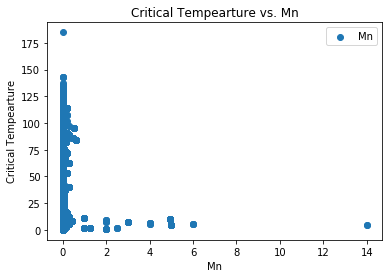

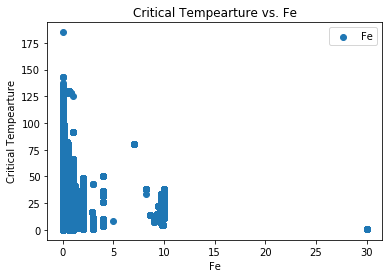

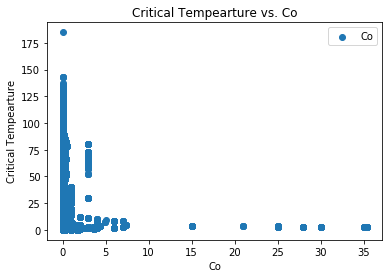

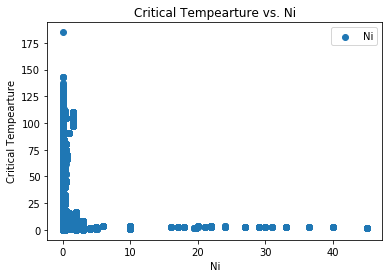

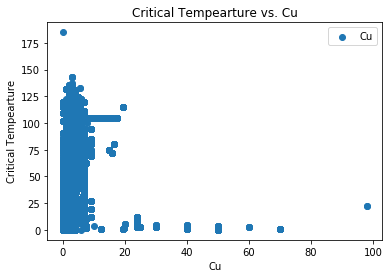

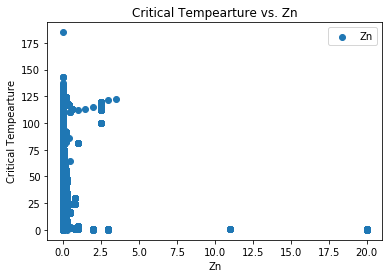

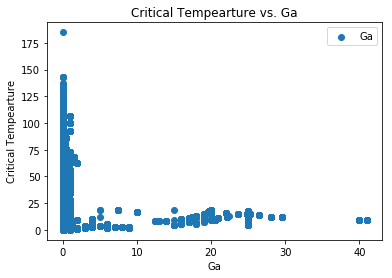

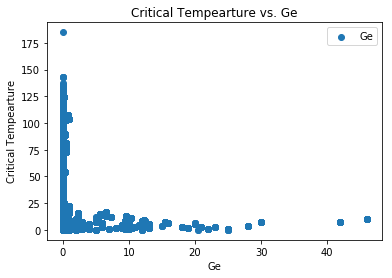

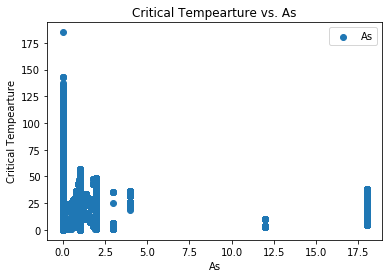

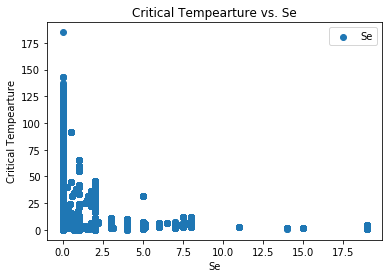

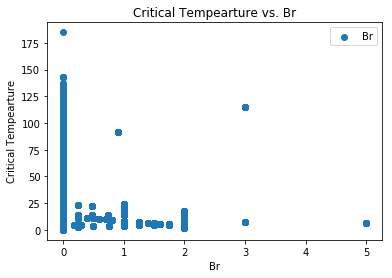

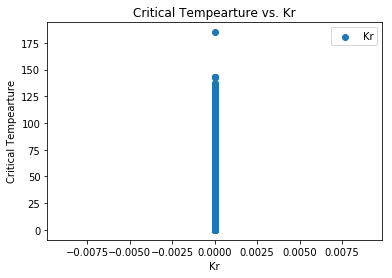

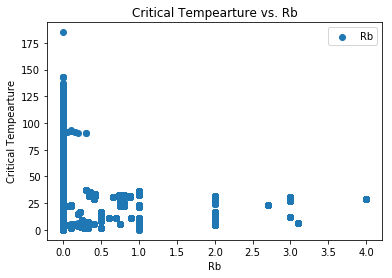

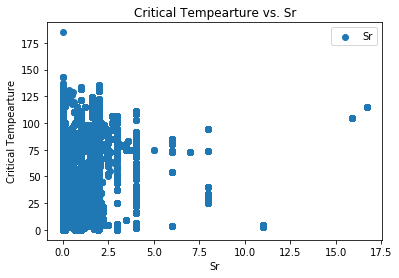

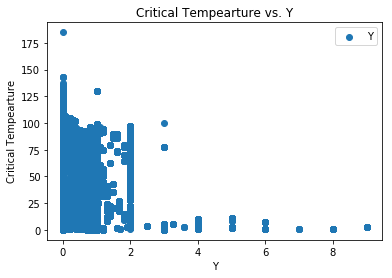

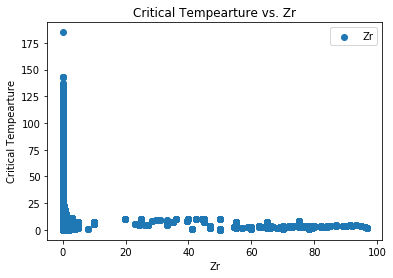

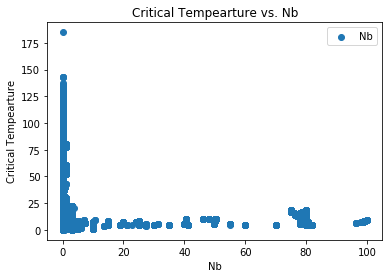

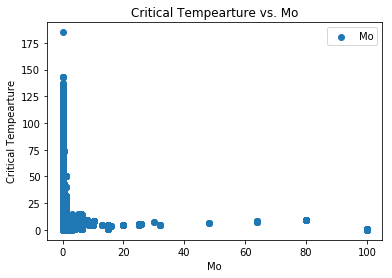

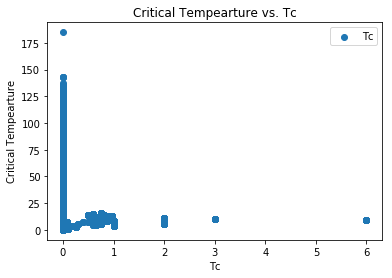

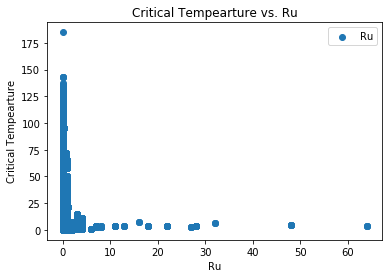

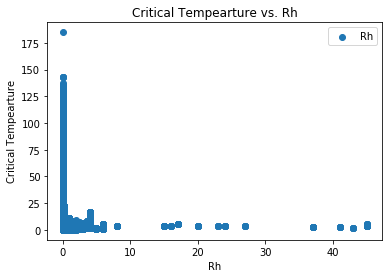

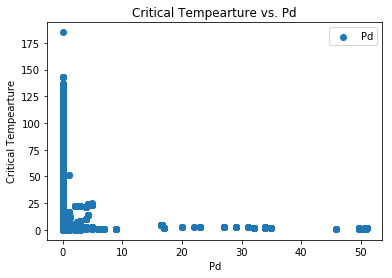

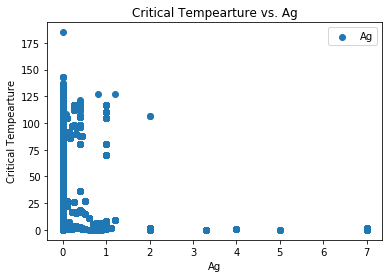

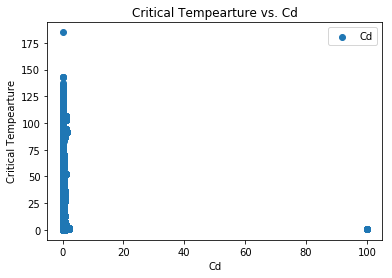

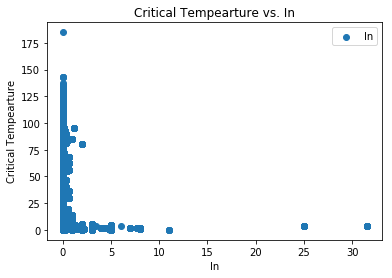

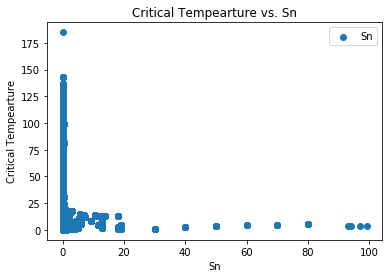

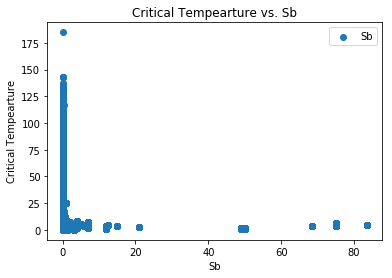

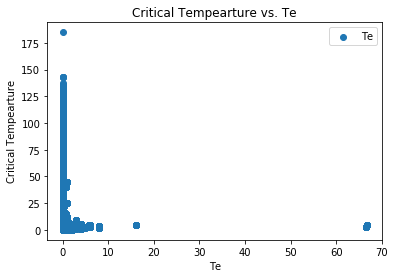

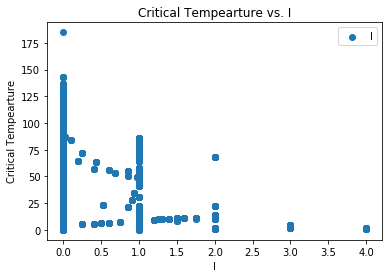

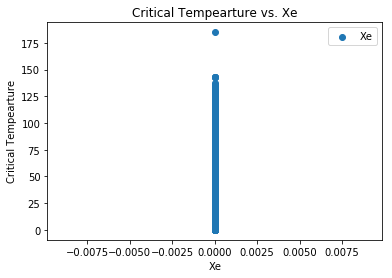

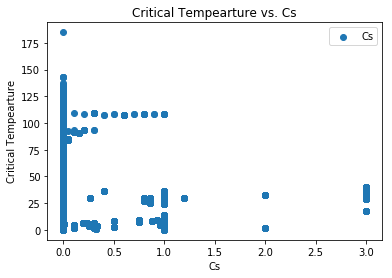

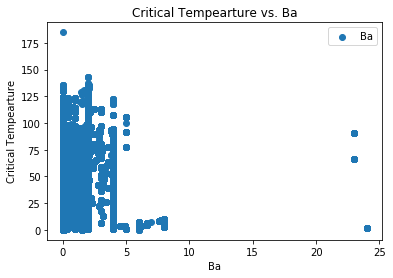

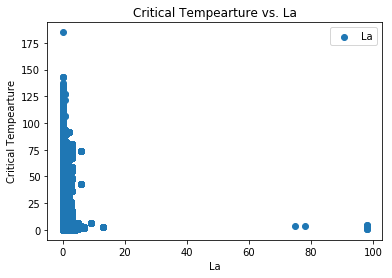

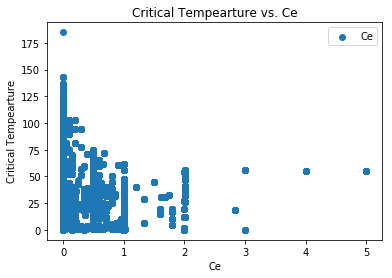

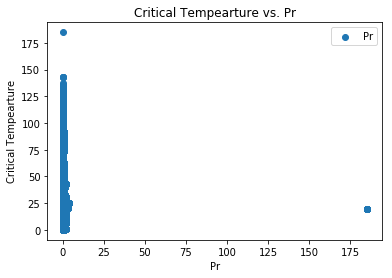

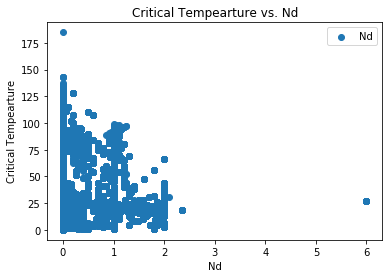

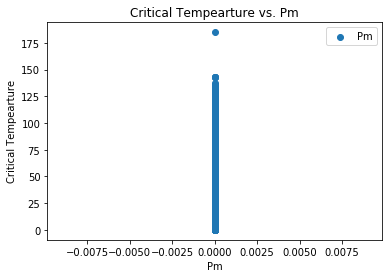

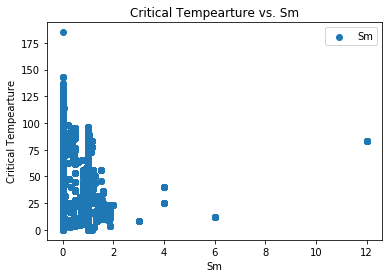

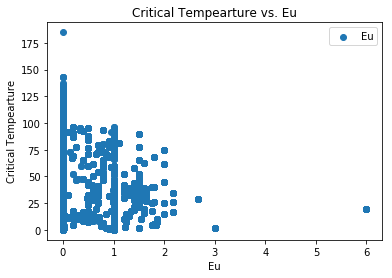

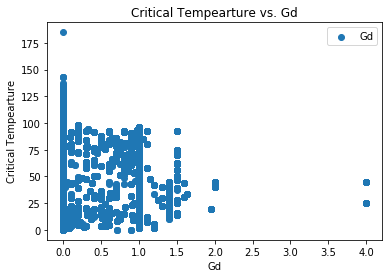

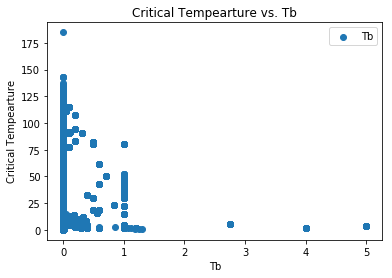

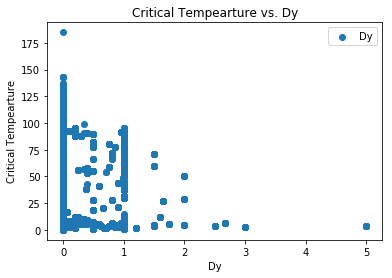

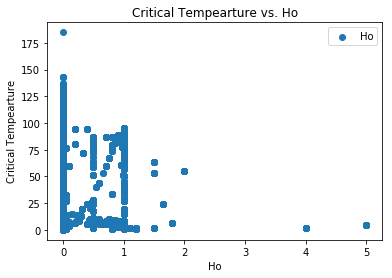

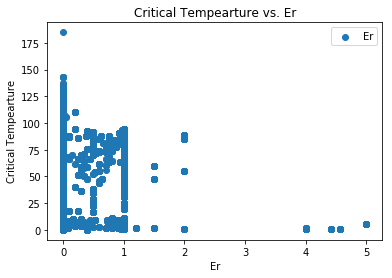

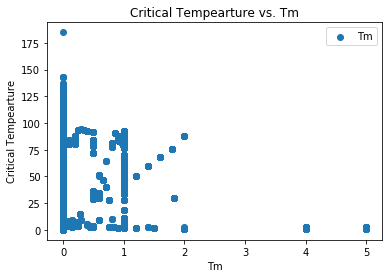

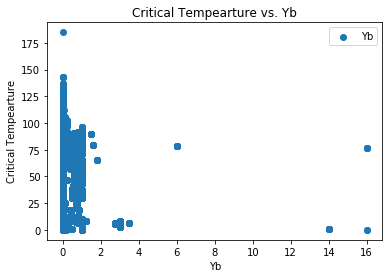

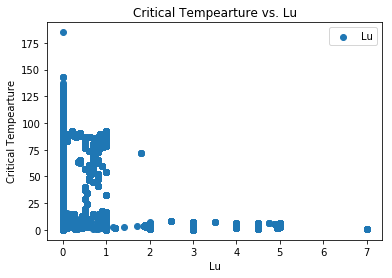

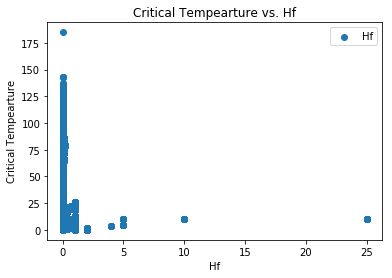

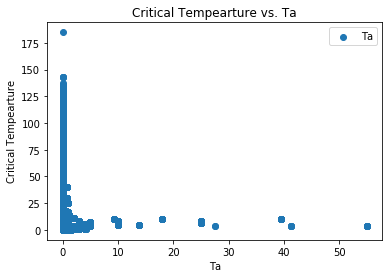

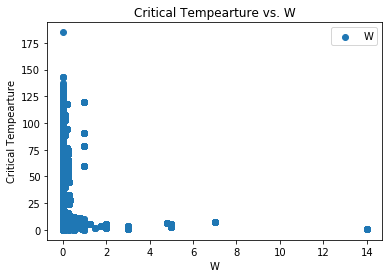

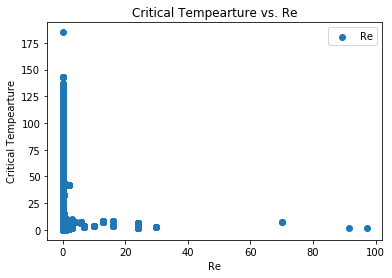

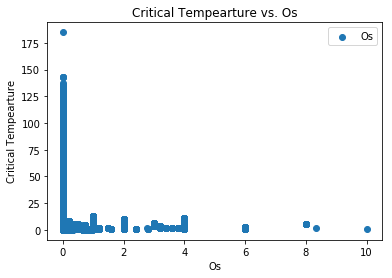

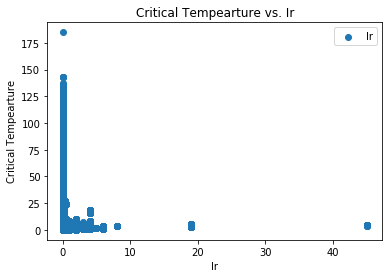

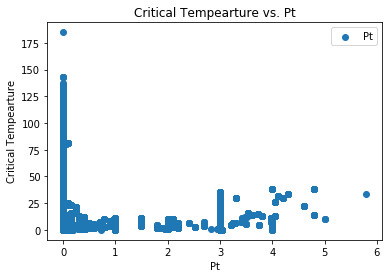

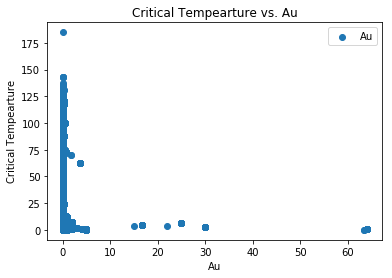

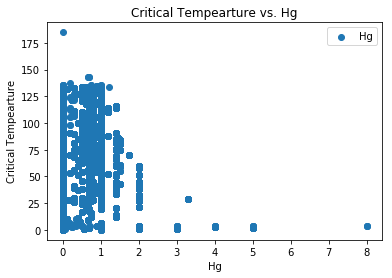

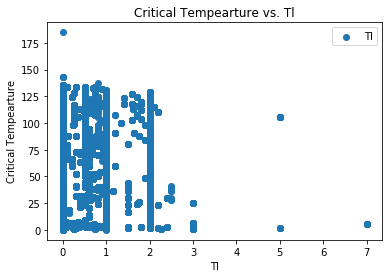

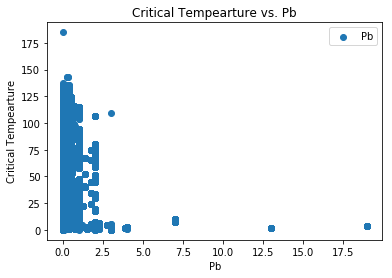

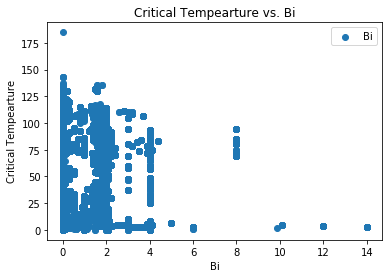

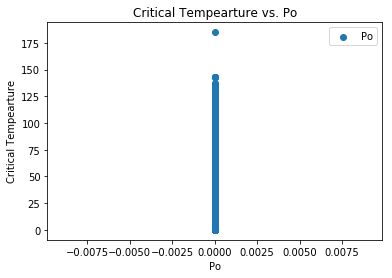

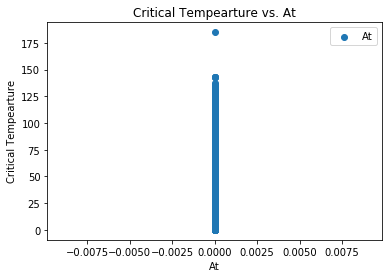

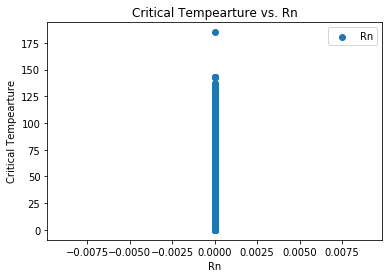

In [17]:
y = combined_data['critical_temp']
for column in combined_data:
    x = combined_data[column]
    plt.scatter(x, y, label = column)
    plt.ylabel('Critical Tempearture')
    plt.xlabel(column)
    plt.title('Critical Tempearture vs. ' + column)
    #plt.legend()
    plt.show()

In [113]:
print('Tc_Mean =', combined_data.critical_temp.std(),
', Tc_Std = ',combined_data.critical_temp.mean())

Tc_Mean = 34.2543624487443 , Tc_Std =  34.421219135352274


In [10]:
y_all = combined_data['critical_temp']
X_all = combined_data.loc[:, combined_data.columns != 'critical_temp']

### Performing PCA to reduce the dimensionallity of the problem space to see if there is underlying structure.

In [11]:
kpca = PCA(n_components = 2)
X_kpca = kpca.fit_transform(X_all)

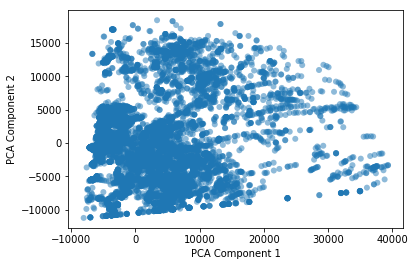

In [12]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### The PCA is not to revealing. There are some zones with high density and some with low density.

In [13]:
kpca3 = PCA(n_components = 3)
X_kpca3 = kpca3.fit_transform(X_all)

### 3D PCA

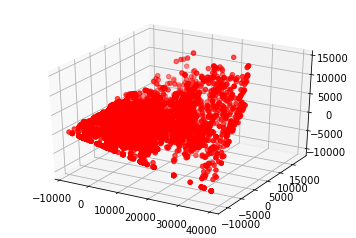

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca3[:, 0], X_kpca3[:, 1], X_kpca3[:, 2], c='r', marker='o')
plt.show()

In [15]:
def createTrainTest(df):
    train, test = train_test_split(df, test_size = 0.3)
    y_train = train.pop('critical_temp')
    y_test = test.pop('critical_temp')
    X_train = train.values
    X_test = test.values
    
    return X_train, y_train, X_test, y_test

### Creating the subgroups that are of interest.

In [16]:
HTC = combined_data[(combined_data.Cu != 0) & (combined_data.O != 0)]
Fe =combined_data[(combined_data.Fe != 0)]
SSC = combined_data[(combined_data.critical_temp < 10)]

datasets = [HTC, Fe, SSC, combined_data]
names = ['HTC', 'Fe', 'SSC', 'Whole Dataset']

In [17]:
model = RandomForestRegressor(n_estimators=100)

In [18]:
X_train, y_train, X_test, y_test = createTrainTest(combined_data) # .iloc[indices]

In [19]:
model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
model.score(X_test, y_test)

0.92556449911791183

### It is of interest to see what features are most important to predicting the critical temperature.

In [21]:
feature_importance = model.feature_importances_

In [22]:
imp_all = list(zip(combined_data.columns, feature_importance))
imp_all = sorted(imp_all, reverse = True, key = lambda v:v[1])

In [23]:
imp_all[:20]

[('Ni', 0.60675759612216573),
 ('K', 0.050126919327159493),
 ('Cs', 0.028382730117499456),
 ('gmean_Valence', 0.022166831967716582),
 ('wtd_gmean_Density', 0.018653803001265588),
 ('N', 0.013297237303937202),
 ('wtd_gmean_Valence', 0.0099350931769263354),
 ('wtd_mean_Valence', 0.0092911726884506371),
 ('entropy_Density', 0.0085526701357139176),
 ('wtd_mean_ThermalConductivity', 0.0084463000130738028),
 ('Cu', 0.0074098760456893916),
 ('Mn', 0.0073635216554403353),
 ('wtd_range_atomic_mass', 0.0071952401899150744),
 ('wtd_std_Valence', 0.0069638272861885682),
 ('wtd_std_ElectronAffinity', 0.0069550248651538684),
 ('Ce', 0.0059758487316327377),
 ('wtd_std_atomic_mass', 0.0054864222474597137),
 ('range_atomic_radius', 0.0052827303365957003),
 ('wtd_mean_atomic_mass', 0.0052199054598834685),
 ('wtd_range_fie', 0.0051233607719147634)]

### It seems that the models most often look at the number of Ni atoms to predict the critical temperature.

### Performing cross validation on each of the data subsets

In [24]:
for i, data in enumerate(datasets):
    X_train, y_train, X_test, y_test = createTrainTest(data)
    scores = cross_val_score(model, X_train, y_train)
    print('Cross Validation R^2 for the ' + names[i] + ' dataset is ' + str(scores.mean()))

Cross Validation R^2 for the HTC dataset is 0.820585145947
Cross Validation R^2 for the Fe dataset is 0.784182229552
Cross Validation R^2 for the SSC dataset is 0.619611245085
Cross Validation R^2 for the Whole Dataset dataset is 0.916294410668


### Generate predictions for each dataset

In [25]:
predictions = []
for i, data in enumerate(datasets):
    y_all = data['critical_temp']
    X_all = data.loc[:, data.columns != 'critical_temp']
    y_p = cross_val_predict(model, X_all, y_all)
    predictions.append(y_p)

### Plotting predicted temp vs actual temp.

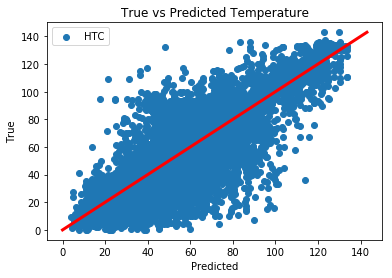

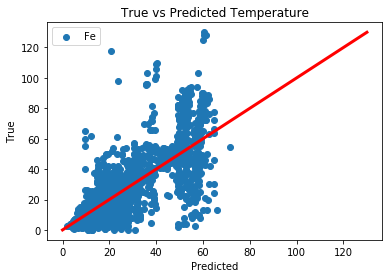

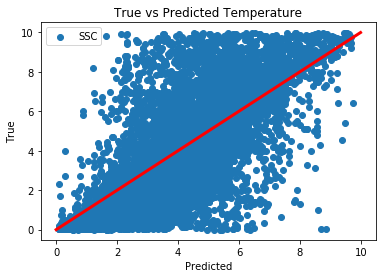

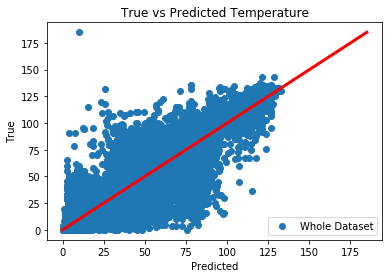

In [26]:
for i, data in enumerate(datasets):
    y_all = data['critical_temp']
    y_p = predictions[i]
    plt.scatter(y_p, y_all, label = names[i])
    x = np.linspace(0, max(y_all), 1000)
    plt.plot(x, x, lw=3, color='red')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('True vs Predicted Temperature')
    plt.legend()
    plt.show()

### Looks like the models perform the best on the whole dataset and the worst on the very low temp cases.

### Going to use AdaBoost regressor on the dataset.

In [27]:
ADA = AdaBoostRegressor(n_estimators=100)

In [28]:
for i, data in enumerate(datasets):
    X_train, y_train, X_test, y_test = createTrainTest(data)
    scores = cross_val_score(ADA, X_train, y_train)
    print('Cross Validation R^2 for the ' + names[i] + ' dataset is ' + str(scores.mean()))

Cross Validation R^2 for the HTC dataset is 0.522914652439
Cross Validation R^2 for the Fe dataset is 0.562478822064
Cross Validation R^2 for the SSC dataset is 0.194216457106
Cross Validation R^2 for the Whole Dataset dataset is 0.710835028803


### The adaboost regressor performs much worse than the random forest. This is most likely because the random forest is resistant to overfitting. The randomness induced by the random splits essentially leads to a wisdom of the crowd effect where each tree is a specialist on a small part of the feature space.

### Below are the cases from the paper

In [ ]:
CsBe(AsO4)
RbAsO2 
KSbO2 
RbSbO2 
CsSbO2 
AgCrO2 
K0:8(Li0:2Sn0:76)O2 
Cs(MoZn)(O3F3) 
Na3Cd2(IrO6) 
Sr3Cd(PtO6) 
Sr3Zn(PtO6) 
(Ba5Br2)Ru2O9 
Ba4(AgO2)(AuO4) 
Sr5(AuO4)2 
RbSeO2F 
CsSeO2F 
KTeO2F 
Na2K4(Tl2O6) 
Na3Ni2BiO6 
Na3Ca2BiO6 
CsCd(BO3) 
K2Cd(SiO4) 
Rb2Cd(SiO4) 
K2Zn(SiO4) 
K2Zn(Si2O6) 
K2Zn(GeO4) 
(K0:6Na1:4)Zn(GeO4) 
K2Zn(Ge2O6) 
Na6Ca3(Ge2O6)3 
Cs3(AlGe2O7) 
K4Ba(Ge3O9) 
K16Sr4(Ge3O9)4
K3Tb[Ge3O8(OH)2] 
K3Eu[Ge3O8(OH)2] 
KBa6Zn4(Ga7O21) 

### I am not able to find the cases in Table 6 within the dataset.

In [41]:
for i in combined_data.index:
    if ('Rb' in i[:4]) and ('As' in i):
        print(i)

Rb1Fe2As2
Rb1Fe2As2
Rb1Fe2As2
Rb1Fe2As2
Rb2Cr3As3
Rb1Fe2As2
Rb1Eu1Fe4As4


In [44]:
for i in combined_data.index:
    if ('Cs' in i) and ('Sb' in i):
        print(i)

In [47]:
for i in combined_data.index:
    if ('Na3' in i):
        print(i)

Na3N1C60
Na3.5N0.5C60
